# Introduction to Rasterio

In [1]:
import rasterio 
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
raster_path = ("https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif")
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


In [4]:
src.name

'https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif'

In [5]:
src.mode

'r'

In [6]:
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [7]:
src.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [8]:
src.res

(90.0, 89.99579177642138)

In [9]:
src.width

4269

In [10]:
src.height

3113

In [11]:
src.bounds

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

In [12]:
src.transform

Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)

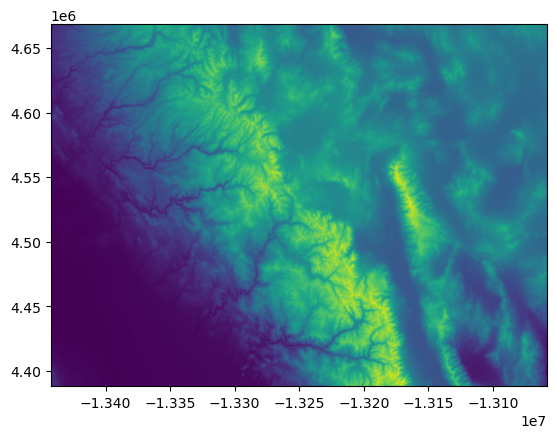

<Axes: >

In [14]:
rasterio.plot.show(src)

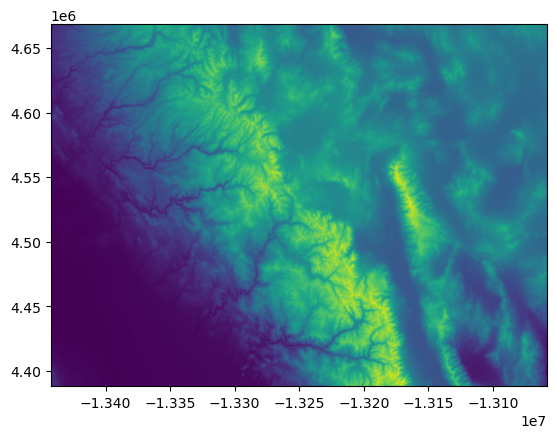

<Axes: >

In [19]:
rasterio.plot.show(src,5)

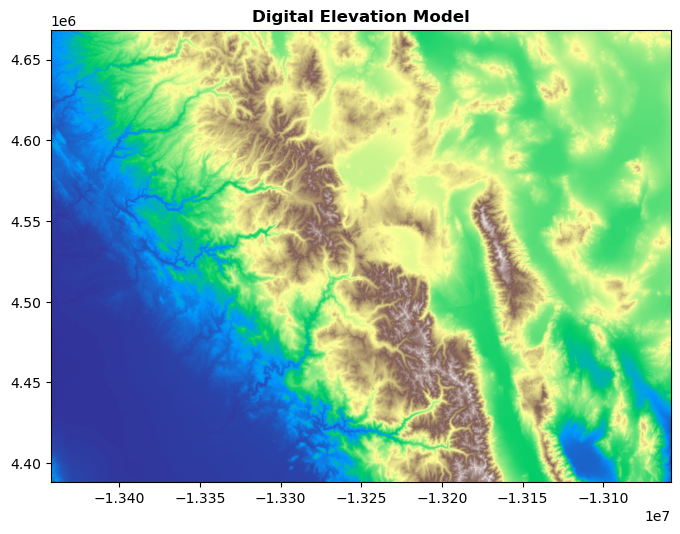

In [23]:
fig,ax = plt.subplots(figsize=(8,8))
rasterio.plot.show(src,cmap='terrain',ax=ax,title="Digital Elevation Model")
plt.show()

In [24]:
dem_bounds = ("https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson")
gdf=gpd.read_file(dem_bounds)
gdf = gdf.to_crs(src.crs)

<Axes: title={'center': 'Digital Elevation Model'}>

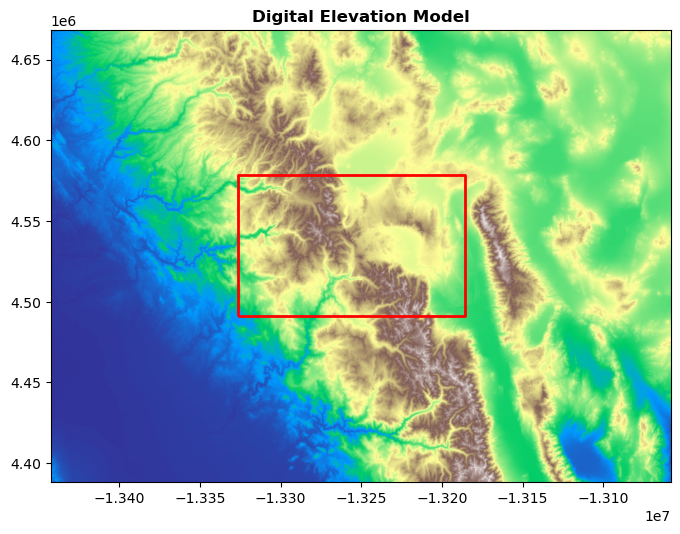

In [30]:
fig,ax = plt.subplots(figsize = (8,8))
rasterio.plot.show(src,cmap='terrain',ax=ax,title='Digital Elevation Model')
gdf.plot(ax=ax,edgecolor='red',facecolor='none', lw=2)

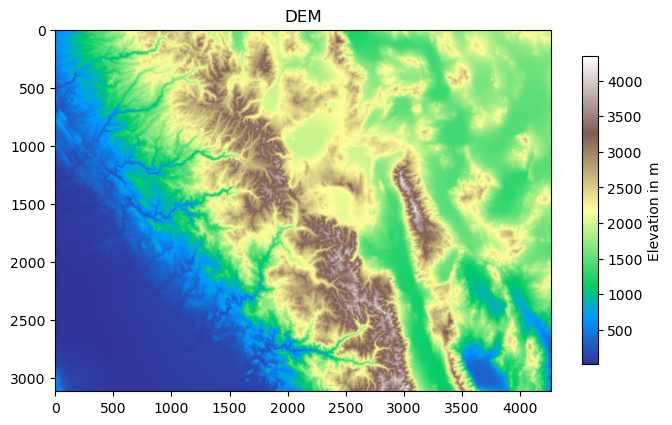

In [71]:
elev_band = src.read(1)
plt.figure(figsize=(8,8))
plt.imshow(elev_band,cmap= 'terrain')
plt.colorbar(label="Elevation in m", shrink = 0.5)
plt.title("DEM")
plt.show()

# Accessing and Manipulation Raster Bands

In [72]:
raster_path = 'https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif'
src=rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif' mode='r'>


In [73]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -inf,
 'width': 2485,
 'height': 2563,
 'count': 7,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'),
 'transform': Affine(90.0, 0.0, 582390.0,
        0.0, -90.0, 4105620.0)}

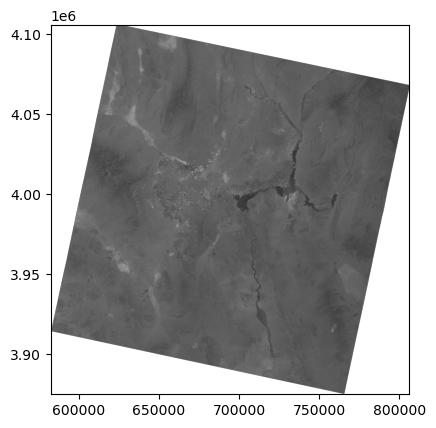

<Axes: >

In [79]:
rasterio.plot.show(src,5,cmap = 'Greys_r')

In [86]:
src.count

7

In [91]:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


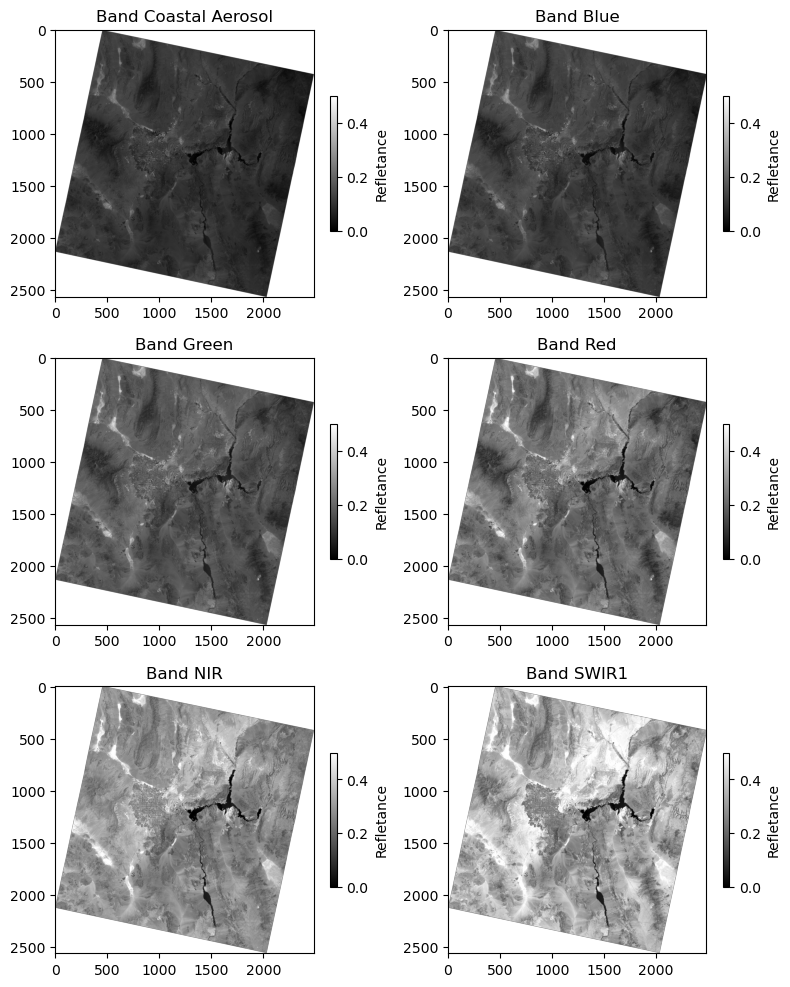

In [94]:
fig,axes = plt.subplots(nrows=3,ncols=2, figsize = (8,10))
axes=axes.flatten()
print(axes)
for band in range (1,src.count):
    data=src.read(band)
    ax = axes[band-1]
    im=ax.imshow(data,cmap='grey',vmin=0, vmax=0.5)
    ax.set_title(f"Band {band_names[band-1]}")
    fig.colorbar(im, ax=ax, label = 'Refletance', shrink = 0.5)
plt.tight_layout()
plt.show()
    


# Stacking the Bands.

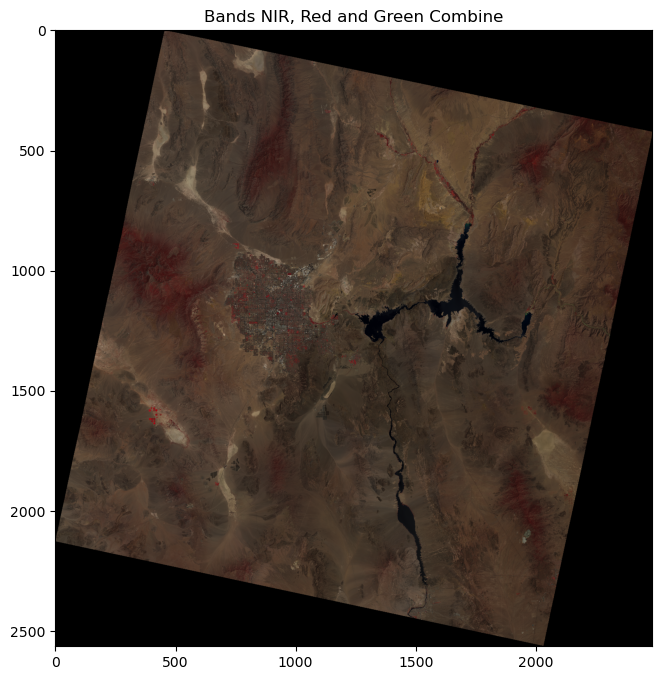

In [97]:
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)
# Stack the band into singel array.
rgb=np.dstack((nir_band,red_band,green_band)).clip(0,1)
plt.figure(figsize = (8,8))
plt.imshow(rgb)
plt.title ('Bands NIR, Red and Green Combine')
plt.show()